In [14]:
# pip install pykan

In [1]:
from kan import *
# from kan import *
from sklearn.model_selection import KFold,cross_val_score
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
import torch
# import process as data
import numpy as np
import scipy.stats.stats as st
import csv
import pandas as pd

In [16]:
# 读取sequence.txt文件，并保存序列和标签
sequences = []
labels = []

# 打开并读取文件内容
with open('sequence.txt', 'r') as file:
    lines = file.readlines()

# 处理每两行一组的序列和标签
for i in range(0, len(lines), 2):
    label = lines[i].split('|')[1].strip()  # 取竖杠后面的标签
    sequence = lines[i + 1].strip()  # 取下一行的序列
    
    labels.append(int(label))
    sequences.append(sequence)

len(sequences),len(labels)


(184, 184)

In [17]:
# 读取sequence.txt文件，并保存序列和标签
sequences_test = []
labels_test = []

# 打开并读取文件内容
with open('sequence_test.txt', 'r') as file:
    lines = file.readlines()

# 处理每两行一组的序列和标签
for i in range(0, len(lines), 2):
    label = lines[i].split('|')[1].strip()  # 取竖杠后面的标签
    sequence = lines[i + 1].strip()  # 取下一行的序列
    
    labels_test.append(int(label))
    sequences_test.append(sequence)

len(sequences_test),len(labels_test)


(740, 184)

In [18]:
def maccs_feature(file):
    maccs_list=[]
    with open(file,'r') as f:
        for line in f:
            maccs=list(map(int,line.strip().split()))
            # print(maccs)
            maccs_list.append(maccs)
    return maccs_list
train_file='maccs_fp.txt'
test_file='maccs_fp_test.txt'
maccs=maccs_feature(train_file)
maccs_test=maccs_feature(test_file)
len(maccs),len(maccs_test)

(740, 184)

In [19]:
def calculate_aac(protein_list):
    amino_acids = 'ACDEFGHIKLMNPQRSTVWY'

    # 初始化存储结果的列表
    aac_list = []

    for protein_sequence in protein_list:
        # 初始化AAC特征字典
        aac = {aa: 0 for aa in amino_acids}

        # 计算每种氨基酸在序列中的频率
        for aa in protein_sequence:
            if aa in aac:
                aac[aa] += 1

        # 将频率转换为比例
        sequence_length = len(protein_sequence)
        aac = [count / sequence_length for aa, count in aac.items()]

        # 将结果添加到列表中
        aac_list.append(aac)

    return aac_list
aac = calculate_aac(sequences)
aac_test = calculate_aac(sequences_test)
len(aac),len(aac_test)

740
184


In [ ]:

def aaindex(filepath):
    protein_list = []
    csv_file_path = 'aaindex1.csv'
    lag = 2
    data = []
    with open(csv_file_path, mode='r', encoding='utf-8') as file:
        csv_reader = csv.reader(file)

        # Skip the first cell of the first row
        for row in csv_reader:
            # Append the row with the first cell removed to the data list
            # data.append([float(value) for value in row[1:]])
            data.append(row[1:])
    data = data[1:]
    AAindex_list = [
        [float(value) if value not in ['NA', ''] else None for value in row]
        for row in data
    ]
    # NAKH900113 【200】，KRIW710101【146】， HUTJ700103【117】，ZIMJ680103【399】，TANS770104【368】，CEDJ970105【459】，QIAN880127【283】，LEVM760107【158】
    # selected_indices = [200, 146, 117, 399, 368,459,283, 158]
    # AAindex_list = [AAindex_list[i] for i in selected_indices if i < len(AAindex_list)]
    with open(filepath, 'r') as file:
        for line in file:
            line = line.strip()
            if not line.startswith(">"):  # 忽略ID行，只保存序列行
                protein_list.append(line)

    autocorrelation = []
    for sequence in protein_list:
        temp = []
        for property_values in AAindex_list:
            # 将氨基酸序列转换为属性值序列
            #     property_values = np.array([property_dict[aa] for aa in sequence])
            property_values = [0 if value is None else value for value in property_values]
            # 计算属性值的平均值
            # print(property_values)
            mean_value = np.mean(property_values)
            # print(mean_value)
            # 计算Moran自相关
            n = len(sequence)
            autocorr = np.sum((property_values[:-lag] - mean_value) * (property_values[lag:] - mean_value))
            autocorr /= (n - lag)
            temp.append(autocorr)

        autocorrelation.append(temp)

    v = []
    for i in range(len(autocorrelation)):
        vtar = autocorrelation[i]
        vtarv = []
        vtar7 = 0
        vtar8 = 0
        vtar9 = 0
        s = pd.Series(vtar)
        vtar3 = np.mean(vtar)  # These 4 dimensions are relevant statistical terms
        vtar4 = st.kurtosis(vtar)
        vtar5 = np.var(vtar)
        vtar6 = st.skew(vtar)
        #for p in range(len(vtar)): # These 3 dimensions are inspired by PAFIG algorithm
        #vtar7=vtar[p]**2+vtar7
        #if vtar[p]>va:
        #vtar8=vtar[p]**2+vtar8
        #else:
        #vtar9=vtar[p]**2+vtar9
        vcf1 = []
        vcf2 = []
        for j in range(len(vtar) - 1):  #Sequence-order-correlation terms
            vcf1.append((vtar[j] - vtar[j + 1]))
        for k in range(len(vtar) - 2):
            vcf2.append((vtar[k] - vtar[k + 2]))
        vtar10 = np.mean(vcf1)
        vtar11 = np.var(vcf1)
        vtar11A = st.kurtosis(vcf1)
        vtar11B = st.skew(vcf1)
        vtar12 = np.mean(vcf2)
        vtar13 = np.var(vcf2)
        vtar13A = st.kurtosis(vcf2)
        vtar13B = st.skew(vcf2)
        vtarv.append(vtar3)
        vtarv.append(vtar4)
        vtarv.append(vtar5)
        vtarv.append(vtar6)
        #vtarv.append(vtar7/len(vtar))
        #vtarv.append(vtar8/len(vtar))
        #vtarv.append(vtar9/len(vtar))
        vtarv.append(vtar10)
        vtarv.append(vtar11)
        vtarv.append(vtar11A)
        vtarv.append(vtar11B)
        vtarv.append(vtar12)
        vtarv.append(vtar13)
        vtarv.append(vtar13A)
        vtarv.append(vtar13B)
        v.append(vtarv)
    return v

train_file='sequence.txt'
test_file='sequence_test.txt'
AC = aaindex(train_file)
AC = np.array(AC)  # 转换为 NumPy 数组

AC_test = aaindex(test_file)
AC_test = np.array(AC_test) 
# print(v.shape,type(v))
# 检查是否为二维数组
if len(AC.shape) == 2:
    # 对每一行进行 Z-score 标准化
    AC = (AC - np.mean(AC, axis=1, keepdims=True)) / np.std(AC, axis=1, keepdims=True)
    print(len(AC))
else:
    print("AC 不是二维数组")

if len(AC_test.shape) == 2:
    # 对每一行进行 Z-score 标准化
    AC_test = (AC_test - np.mean(AC_test, axis=1, keepdims=True)) / np.std(AC_test, axis=1, keepdims=True)
    print(len(AC_test))
else:
    print("AC_test 不是二维数组")

In [21]:
train_encodings=np.concatenate((aac,maccs,AC),axis=1)
test_encodings=np.concatenate((aac_test,maccs_test,AC_test),axis=1)

# train_encodings=np.concatenate((aac,maccs),axis=1)
# test_encodings=np.concatenate((aac_test,maccs_test),axis=1)
# # 
# train_encodings=np.concatenate((aac,AC),axis=1)
# test_encodings=np.concatenate((aac_test,AC_test),axis=1)
# 
# train_encodings=np.concatenate((maccs,AC),axis=1)
# test_encodings=np.concatenate((maccs_test,AC_test),axis=1)

train_encodings.shape,test_encodings.shape

/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:24: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:25: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:26: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.clone().detach() or sourceTensor.clone().detach().requires_grad_(True), rather than torch.tensor(sourceTensor).
/home/wangli/anaconda3/envs/mykan/lib/python3.7/site-packages/ipykernel_launcher.py:27: UserWarning: To copy construct from a tensor, it is recommen

torch.Size([740, 199])

In [ ]:
from sklearn.utils import shuffle
X_train, y_train = shuffle(train_encodings, labels, random_state=42)
X_test, y_test = shuffle(test_encodings, labels_test, random_state=42)

from sklearn.preprocessing import StandardScaler

# 初始化 StandardScaler
scaler = StandardScaler()

# 对 X_train 进行标准化
X_train = scaler.fit_transform(X_train)

# 对 X_test 进行标准化
X_test = scaler.transform(X_test)

X_train=np.array(X_train)
X_test=np.array(X_test)
y_train=np.array(y_train)
y_test=np.array(y_test)
X_train = torch.tensor(X_train)
y_train = torch.tensor(y_train).view(-1, 1)
X_test = torch.tensor(X_test)
y_test = torch.tensor(y_test).view(-1, 1)
X_train = torch.tensor(X_train ,dtype=torch.float32)
y_train = torch.tensor(y_train,dtype=torch.float32)
X_test = torch.tensor(X_test,dtype=torch.float32)
y_test = torch.tensor(y_test,dtype=torch.float32)
dataset = {}
dataset = {
    'train_input': X_train,
    'test_input': X_test,
    'train_label': y_train,
    'test_label': y_test
}
X_train.shape

In [ ]:
model = KAN(width=[199,5,5,1], grid=5, k=3, seed=42) 
#初始化完模型就可以可视化原数据
# model(dataset['train_input'])
# model.plot(beta=100)
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
def train_acc():
    pred=model(X_train)
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_train.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC: {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

def test_acc():
    pred=model(X_test)
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_test.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC(test): {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

# results = model.train(dataset, opt="LBFGS", steps=10, metrics=(train_acc, test_acc)) ,lamb=0.001 lamb_entropy=4.,lamb=0.1,lamb_l1=2.5,
# lamb=0.005 train/fit   epoch30
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

In [ ]:
from hyperopt import hp
space = {
    # 'width': [
    #     # hp.quniform('width1', 50, 250, 1),  # 第一层宽度，范围50到250
    #     hp.quniform('width2', 2, 100, 1),   # 第二层宽度，范围2到100
    #     hp.quniform('width3', 1, 10, 1)     # 第三层宽度，范围1到10
    # ],
    'width2': hp.quniform('width2', 2, 7, 1),
    'width3': hp.quniform('width3', 2, 7, 1),
    # grid值可以在一个合理的范围内调整，比如1到20
    'grid': hp.quniform('grid', 2, 7, 1),
    # k的取值可以在2到20之间调整
    'k': hp.quniform('k', 2, 7, 1),
    # seed通常不需要优化，但如果需要固定，也可以保持不变
    # 'seed': 42  # 固定种子
}

In [15]:
def objective(params):

    from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
    def train_acc():
        pred=model(X_train)
        with torch.no_grad():
            pred_labels = (pred > 0.5).float()
            auc = roc_auc_score(y_train.cpu(), pred.cpu())

        # 混淆矩阵计算
            tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

            # Specificity (SP)
            sp = tn / (tn + fp) if (tn + fp) > 0 else 0

            acc = (tp + tn) / (tp + tn + fp + fn)

            # Sensitivity (SN)
            sn = tp / (tp + fn) if (tp + fn) > 0 else 0

            # Matthews Correlation Coefficient (MCC)
            mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
        print(f"ACC: {acc:.4f}, AUC: {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
        return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

    def test_acc():
        pred=model(X_test)
        with torch.no_grad():
            pred_labels = (pred > 0.5).float()
            auc = roc_auc_score(y_test.cpu(), pred.cpu())

        # 混淆矩阵计算
            tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

            # Specificity (SP)
            sp = tn / (tn + fp) if (tn + fp) > 0 else 0

            acc = (tp + tn) / (tp + tn + fp + fn)

            # Sensitivity (SN)
            sn = tp / (tp + fn) if (tp + fn) > 0 else 0

            # Matthews Correlation Coefficient (MCC)
            mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
        print(f"ACC: {acc:.4f}, AUC(test): {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
        return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

    # 使用传入的超参数初始化 KAN 模型
    # model = KAN(width=[199,3,1], grid=int(params['grid']), k=int(params['k']), seed=params['seed'])
    model = KAN(
        width=[199, int(params['width2']), int(params['width3']), 1],  # 固定第一个和第三个参数，优化第二个参数
        grid=int(params['grid']),
        k=int(params['k']),
        # seed=params['seed']
    )
    print("params['width2'],params['width2'],int(params['grid']),int(params['k'])",int(params['width2']),int(params['width3']),int(params['grid']),int(params['k']))
    # print("int(params['grid']),",int(params['grid']))
    # print("int(params['k'])",int(params['k']))
    # loss_fn=torch.nn.CrossEntropyLoss()
    # 使用指定的优化器、训练步数和评估指标训练模型
    # results = model.fit(dataset, opt="LBFGS", steps=3, metrics=(train_acc, test_acc));
    results = model.fit(
        dataset, 
        opt="LBFGS", 
        steps=5, 
        metrics=(train_acc, test_acc)
        # loss_fn=loss_fn
    )
    weight_train = 0.3
    weight_test = 0.7
    # accuracy_score = weight_train * results['train_acc'][-1] + weight_test * results['test_acc'][-1]
    # 
    train_accuracy=results['train_acc'][-1]
    test_accuracy=results['test_acc'][-1]
    # print('test_accuracy',test_accuracy)
    # 获取测试集准确率（results 中第二个指标是 test_acc）
    # test_accuracy = test_acc()

    # 返回负的测试集准确率，优化时最大化准确率
    return {
        'loss': -test_accuracy,  # 返回负的测试准确率用于最小化
        'test_acc': test_accuracy,  # 测试集准确率
        'train_acc': train_accuracy,  # 训练集准确率
        'status': 'ok'  # hyperopt 要求有 status 字段
    } # 取负数使其最小化负准确率



In [ ]:
from hyperopt import fmin, tpe, Trials, space_eval

# 定义 Trials 对象来跟踪训练过程
trials = Trials()

# 调用 fmin 进行优化
best = fmin(
    fn=objective,          # 目标函数
    space=space,           # 搜索空间
    algo=tpe.suggest,      # 使用TPE算法
    max_evals=20,          # 最大评估次数
    trials=trials          # 记录每次的评估
)

# 计算最佳参数
best_params = space_eval(space, best)

# 从 trials 中获取最好的评估结果
best_trial = min(trials.results, key=lambda x: x['loss'])  # 'loss' 是 objective 返回值

# 计算最佳准确率
best_accuracy = -best_trial['loss']  # 取反，获得准确率

print("最佳参数：", best_params)
print("最佳准确率：", best_accuracy)


In [ ]:
from hyperopt import fmin, tpe, Trials, space_eval

# 调用 fmin 函数进行优化
best = fmin(
    fn=objective,          # 目标函数
    space=space,           # 超参数搜索空间
    algo=tpe.suggest,      # TPE 算法用于搜索
    max_evals=10,         # 最大评估次数
    trials=Trials()        # 保存试验结果
)
# 计算最佳参数
best_params = space_eval(space, best)
best_accuracy = -objective(best)  # 计算最佳准确率

print("最佳参数：", best_params)
print("最佳准确率：", best_accuracy)


In [ ]:
print(X_train[0])

In [ ]:
# 目前最好的参数搜索空间为
# 'width2': hp.quniform('width2', 2, 7, 1),
#     # grid值可以在一个合理的范围内调整，比如1到20
#     'grid': hp.quniform('grid', 2, 7, 1),
#     # k的取值可以在2到20之间调整
#     'k': hp.quniform('k', 2, 7, 1),
# 接下来的思路 增加网格参数 原论文是800（0-1800）
# 另外，增加KAN到四层进行实验
#试试剪枝技术

In [ ]:
# dataset['train_input']

In [ ]:
# from kan import KAN
model = KAN(width=[199,5,1], grid=5, k=3, seed=42) 
#初始化完模型就可以可视化原数据
# model(dataset['train_input'])
# model.plot(beta=100)
from sklearn.metrics import roc_auc_score, confusion_matrix, matthews_corrcoef
def train_acc():
    pred=model(X_train)
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_train.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_train.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_train.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC: {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_train)[:, 0]) == y_train[:, 0]).float())

def test_acc():
    pred=model(X_test)
    with torch.no_grad():
        pred_labels = (pred >= 0.5).float() 
        auc = roc_auc_score(y_test.cpu(), pred.cpu())

    # 混淆矩阵计算
        tn, fp, fn, tp = confusion_matrix(y_test.cpu(), pred_labels.cpu()).ravel()

        # Specificity (SP)
        sp = tn / (tn + fp) if (tn + fp) > 0 else 0
        
        acc = (tp + tn) / (tp + tn + fp + fn)

        # Sensitivity (SN)
        sn = tp / (tp + fn) if (tp + fn) > 0 else 0

        # Matthews Correlation Coefficient (MCC)
        mcc = matthews_corrcoef(y_test.cpu(), pred_labels.cpu())
    print(f"ACC: {acc:.4f}, AUC(test): {auc:.4f}, SP: {sp:.4f}, MCC: {mcc:.4f}, SN: {sn:.4f}")
    return torch.mean((torch.round(model(X_test)[:, 0]) == y_test[:, 0]).float())

# results = model.train(dataset, opt="LBFGS", steps=10, metrics=(train_acc, test_acc)) ,lamb=0.001 lamb_entropy=4.,lamb=0.1,lamb_l1=2.5,
# lamb=0.005 train/fit   epoch30
# image_folder="/tmp/pycharm_project_763/result/"  in_vars=[""] * 200, save_fig=True,img_folder=image_folder
img_folder='./video'
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc), in_vars=list(range(1, 200)), out_vars=['CPP'],img_folder=img_folder)
print("results['train_loss']",results['train_loss'])
print("results['test_loss']",results['test_loss'])
print("results['reg']",results['reg'])
print(results['train_acc'][-1], results['test_acc'][-1])
import moviepy
import moviepy.video.io.ImageSequenceClip
import os
video_name = 'video'
fps = 10
# image_folder="/tmp/pycharm_project_763/result/" 
# files = os.listdir(img_folder)
# train_index = []
# 
# for file in files:
#     if file[0].isdigit() and file.endswith('.jpg'):
#         train_index.append(int(file[:-4]))
# train_index = np.sort(train_index)
# print(train_index)
# image_files = [img_folder + '/' + str(train_index[index]) + '.jpg' for index in train_index]
# clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
# clip.write_gif(video_name + '.gif')

In [ ]:
model(dataset['train_input']);
model.plot(beta=100, scale=1, in_vars=list(range(1, 200)), out_vars=['CPP'])


In [ ]:
image_folder="/tmp/pycharm_project_763/result/"
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc),save_fig=True, img_folder=image_folder)
import moviepy
import moviepy.video.io.ImageSequenceClip
import os
video_name = 'video'
fps = 10

files = os.listdir(image_folder)
train_index = []
for file in files:
    if file[0].isdigit() and file.endswith('.jpg'):
        train_index.append(int(file[:-4]))
train_index = np.sort(train_index)
# print(train_index)
image_files = [image_folder + '/' + str(train_index[index]) + '.jpg' for index in train_index]
clip = moviepy.video.io.ImageSequenceClip.ImageSequenceClip(image_files, fps=fps)
clip.write_gif(video_name + '.gif')


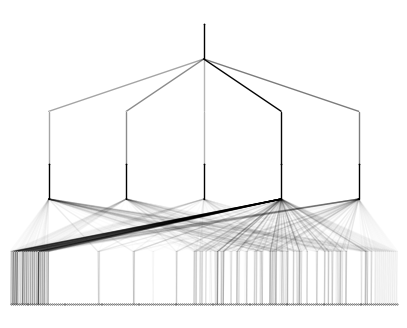

In [68]:
model.plot()

saving model version 0.4


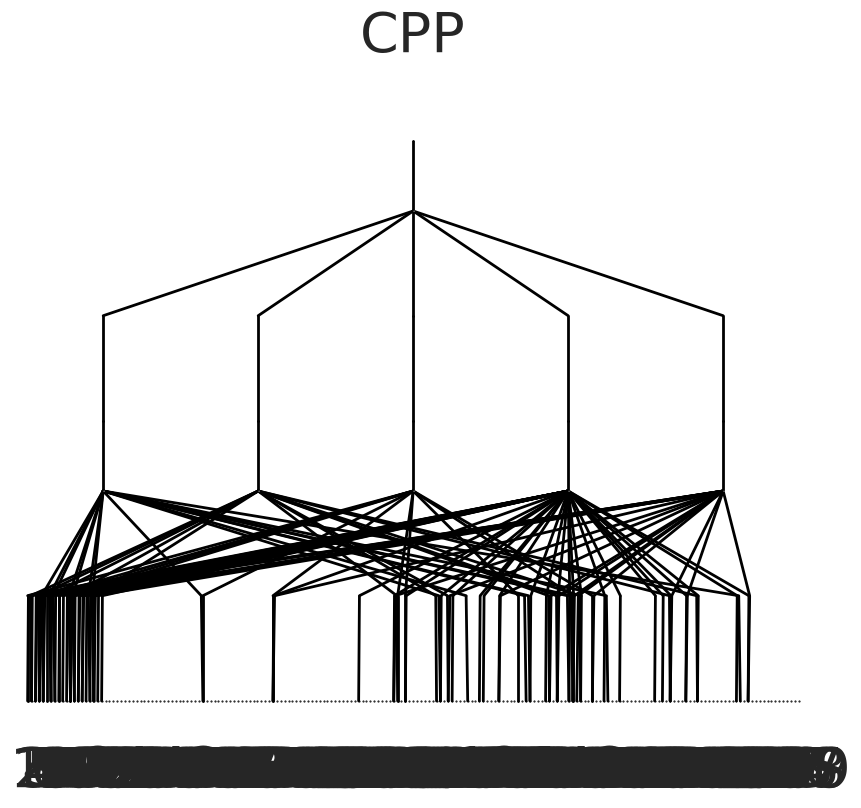

In [91]:
# 对整体的数据z-score 避免NaN  还没尝试 先修正再prune
model = model.prune()
model.plot(beta=100, scale=1, in_vars=list(range(1, 200)), out_vars=['CPP'])

In [80]:
if  np.isnan(dataset['train_input']).any() or np.isinf(dataset['test_input']).any() : 
   print("数组中含有 NaN 或无穷大的值")

In [ ]:
#最后一个特征有问题
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

In [ ]:
# 修正没问题
model = model.refine(10)
model.plot(beta=100, scale=1, in_vars=list(range(1, 200)), out_vars=['CPP'])

In [ ]:
results = model.fit(dataset, opt="LBFGS", steps=5, metrics=(train_acc, test_acc));
print(results['train_acc'][-1], results['test_acc'][-1])

fixing (0,0,0) with 0
fixing (0,0,1) with x, r2=0.8073257207870483, c=1
fixing (0,0,2) with x, r2=0.7726001143455505, c=1
fixing (0,0,3) with x, r2=0.012177565135061741, c=1
fixing (0,0,4) with x, r2=0.4639022648334503, c=1
fixing (0,1,0) with x, r2=0.021107731387019157, c=1
fixing (0,1,1) with x, r2=0.6543233394622803, c=1
fixing (0,1,2) with x, r2=0.6154491901397705, c=1
fixing (0,1,3) with 0
fixing (0,1,4) with x, r2=0.2076256275177002, c=1
fixing (0,2,0) with 0
fixing (0,2,1) with x, r2=0.9136815667152405, c=1
fixing (0,2,2) with 0
fixing (0,2,3) with x, r2=0.052707742899656296, c=1
fixing (0,2,4) with x, r2=0.9773017168045044, c=1
fixing (0,3,0) with x, r2=0.7842553853988647, c=1
fixing (0,3,1) with x^2, r2=0.997707188129425, c=2
fixing (0,3,2) with 0
fixing (0,3,3) with x, r2=0.7112997770309448, c=1
fixing (0,3,4) with x, r2=0.73753821849823, c=1
fixing (0,4,0) with 0
fixing (0,4,1) with x, r2=0.6773949265480042, c=1
fixing (0,4,2) with 0
fixing (0,4,3) with x, r2=0.1345877349376

KeyboardInterrupt: 

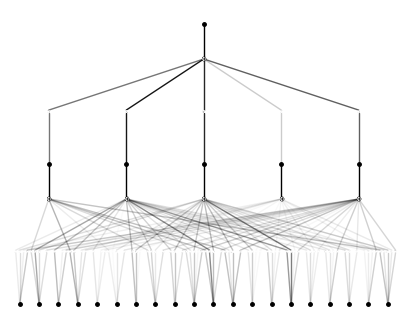

In [84]:
model.plot()
mode = "auto"  # "manual"
"""
假设在一个神经网络模型中，坐标 (0,36,4) 可能表示：

层索引 (0): 第一层或第一个处理阶段。
单元索引 (36): 第一层中的第 37 个单元（因为索引从 0 开始）。
通道或特征索引 (4): 第 5 个通道或特征
"""

if mode == "manual":
    # manual mode
    model.fix_symbolic(0, 0, 0, 'sin');
    model.fix_symbolic(0, 1, 0, 'x^2');
    model.fix_symbolic(1, 0, 0, 'exp');
elif mode == "auto":
    # automatic mode
    lib = ['x', 'x^2', 'x^3', 'x^4', 'exp', 'log', 'sqrt', 'tanh', 'sin', 'abs']
    model.auto_symbolic(lib=lib)

In [ ]:

from kan.utils import ex_round

ex_round(model.symbolic_formula()[0][0], 4)


In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.datasets import make_classification
#以下代码是一个3层的
# 生成一个示例数据集
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义MLP模型
mlp = MLPClassifier(max_iter=1000)

# 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(10,10),(20,20),(30,), (40,), (50,), (60,), (70,), (80,),(90,),(100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最佳参数
print(f"Best parameters: {grid_search.best_params_}")

train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# 计算混淆矩阵
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Sensitivity (SP)
    sensitivity = tp / (tp + fn)
    # Specificity (SE)
    specificity = tn / (tn + fp)
    # MCC
    mcc = matthews_corrcoef(y_true, y_pred)
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return sensitivity, specificity, mcc, accuracy

# 训练集评估
train_sensitivity, train_specificity, train_mcc, train_accuracy = calculate_metrics(y_train, train_preds)
print(f"Training Sensitivity (SP): {train_sensitivity:.4f}")
print(f"Training Specificity (SE): {train_specificity:.4f}")
print(f"Training MCC: {train_mcc:.4f}")
print(f"Training Accuracy (ACC): {train_accuracy:.4f}")

# 测试集评估
test_sensitivity, test_specificity, test_mcc, test_accuracy = calculate_metrics(y_test, test_preds)
print(f"Test Sensitivity (SP): {test_sensitivity:.4f}")
print(f"Test Specificity (SE): {test_specificity:.4f}")
print(f"Test MCC: {test_mcc:.4f}")
print(f"Test Accuracy (ACC): {test_accuracy:.4f}")

# AUC计算
test_probs = grid_search.predict_proba(X_test)[:, 1]
train_probs = grid_search.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)
print(f"Training AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

In [ ]:
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import accuracy_score, roc_auc_score, matthews_corrcoef, confusion_matrix, roc_curve
from sklearn.datasets import make_classification
#以下代码是一个3层的
# 生成一个示例数据集
# X, y = make_classification(n_samples=1000, n_features=20, n_classes=2, random_state=42)

# 划分训练集和测试集
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# 定义MLP模型
mlp = MLPClassifier(max_iter=1000)

# 定义参数网格
param_grid = {
    'hidden_layer_sizes': [(10,10),(20,20),(30,30), (40,40), (50,50), (60,60), (70,70), (80,80),(90,90),(100,100)],
    'activation': ['tanh', 'relu'],
    'solver': ['adam', 'sgd'],
    'alpha': [0.0001, 0.001],
    'learning_rate': ['constant', 'adaptive'],
}

# 使用GridSearchCV进行网格搜索
grid_search = GridSearchCV(mlp, param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# 最佳参数
print(f"Best parameters: {grid_search.best_params_}")

train_preds = grid_search.predict(X_train)
test_preds = grid_search.predict(X_test)

# 计算混淆矩阵
def calculate_metrics(y_true, y_pred):
    tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()
    # Sensitivity (SP)
    sensitivity = tp / (tp + fn)
    # Specificity (SE)
    specificity = tn / (tn + fp)
    # MCC
    mcc = matthews_corrcoef(y_true, y_pred)
    # Accuracy
    accuracy = accuracy_score(y_true, y_pred)
    return sensitivity, specificity, mcc, accuracy

# 训练集评估
train_sensitivity, train_specificity, train_mcc, train_accuracy = calculate_metrics(y_train, train_preds)
print(f"Training Sensitivity (SP): {train_sensitivity:.4f}")
print(f"Training Specificity (SE): {train_specificity:.4f}")
print(f"Training MCC: {train_mcc:.4f}")
print(f"Training Accuracy (ACC): {train_accuracy:.4f}")

# 测试集评估
test_sensitivity, test_specificity, test_mcc, test_accuracy = calculate_metrics(y_test, test_preds)
print(f"Test Sensitivity (SP): {test_sensitivity:.4f}")
print(f"Test Specificity (SE): {test_specificity:.4f}")
print(f"Test MCC: {test_mcc:.4f}")
print(f"Test Accuracy (ACC): {test_accuracy:.4f}")

# AUC计算
test_probs = grid_search.predict_proba(X_test)[:, 1]
train_probs = grid_search.predict_proba(X_train)[:, 1]

train_auc = roc_auc_score(y_train, train_probs)
test_auc = roc_auc_score(y_test, test_probs)
print(f"Training AUC: {train_auc:.4f}")
print(f"Test AUC: {test_auc:.4f}")

In [ ]:
import pandas

protein_list = []
with open('/tmp/pycharm_project_763/model/sequence_test.txt', 'r') as file:
        for line in file:
            line = line.strip()
            if not line.startswith(">"):  # 忽略ID行，只保存序列行
                protein_list.append(line)
from rdkit import Chem
from rdkit.Chem import Draw
from rdkit.Chem.Draw import IPythonConsole
IPythonConsole.ipython_useSVG = True
from rdkit import Chem
from rdkit.Chem import AllChem, MACCSkeys

with open('/tmp/pycharm_project_763/model/maccs_fp_test.txt', 'w') as f:
    for seq in protein_list:
        peptide = Chem.MolToSmiles(Chem.MolFromFASTA(seq))
        peptide_smiles = Chem.MolFromFASTA(seq)
        if peptide_smiles is None:
            raise ValueError("SMILES字符串无效，无法转换为Mol对象")
        print(type(peptide_smiles))
        maccs_fp = MACCSkeys.GenMACCSKeys(peptide_smiles)
        # print(' '.join(list(maccs_fp)))
        print(' '.join(map(str, list(maccs_fp))))
        maccs_fp = ' '.join(map(str, list(maccs_fp)))
        # f.write(peptide+'\t'+str(maccs_fp)+'\n')
        f.write(maccs_fp + '\n')
print()